In [1]:
!pip install -q imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
CC = pd.read_csv('creditcard.csv')

/tmp/ipython-input-3-1380760065.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  CC = pd.read_csv('creditcard.csv')


In [4]:
CC.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112983 entries, 0 to 112982
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    112983 non-null  int64  
 1   V1      112983 non-null  float64
 2   V2      112983 non-null  float64
 3   V3      112983 non-null  float64
 4   V4      112983 non-null  float64
 5   V5      112983 non-null  float64
 6   V6      112983 non-null  float64
 7   V7      112983 non-null  float64
 8   V8      112983 non-null  float64
 9   V9      112983 non-null  float64
 10  V10     112983 non-null  float64
 11  V11     112983 non-null  float64
 12  V12     112983 non-null  float64
 13  V13     112983 non-null  float64
 14  V14     112983 non-null  float64
 15  V15     112983 non-null  float64
 16  V16     112983 non-null  float64
 17  V17     112983 non-null  float64
 18  V18     112983 non-null  float64
 19  V19     112983 non-null  float64
 20  V20     112983 non-null  float64
 21  V21     11

In [6]:
CC.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,112983.000000,112983.000000,112983.000000,112983.000000,112983.000000,112983.000000,112983.000000,112983.000000,112983.000000,112983.000000,...,112983.000000,112983.000000,112983.000000,112982.000000,112982.000000,112982.000000,112982.000000,112982.000000,112982.000000,112982.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,110357.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.140304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,73.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,45605.298452,-0.255786,-0.017552,0.680632,0.155668,-0.283972,0.094067,-0.115067,0.059102,-0.065239,...,-0.033300,-0.110538,NaN,0.011010,0.132531,0.026702,0.001181,0.002032,95.317461,0.002133
std,18301.896908,1.845384,1.639495,1.304647,1.339034,1.339017,1.296306,1.199229,1.228404,1.102994,...,0.737532,0.638890,NaN,0.595327,0.439274,0.491096,0.391378,0.318130,258.284389,0.046136
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,NaN,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,34916.500000,-1.022374,-0.590931,0.175610,-0.708109,-0.905394,-0.650179,-0.603802,-0.134250,-0.700746,...,-0.224898,-0.538444,NaN,-0.323889,-0.131651,-0.323106,-0.060942,-0.004845,6.990000,0.000000
50%,47451.000000,-0.261723,0.083810,0.755817,0.182412,-0.316988,-0.159483,-0.068344,0.077687,-0.131129,...,-0.057836,-0.087084,NaN,0.066965,0.170100,-0.066299,0.010610,0.023399,25.000000,0.000000
75%,60439.000000,1.155455,0.746683,1.378738,1.017483,0.243658,0.486405,0.411015,0.369059,0.523527,...,0.118681,0.309598,NaN,0.408099,0.420490,0.293707,0.084657,0.077000,85.987500,0.000000


In [7]:
CC.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [8]:
CC.dropna(inplace=True)

In [9]:
duplicate_count = CC.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 448


In [10]:
CC.drop_duplicates(inplace=True)

In [11]:
# Display class distribution after cleaning
print("\nClass distribution after cleaning:")
print(CC['Class'].value_counts())



Class distribution after cleaning:
Class
0.0    112298
1.0       236
Name: count, dtype: int64


In [12]:
scaler = StandardScaler()

In [13]:
#Normalize 'Amount' and 'Time'
CC['Amount'] = scaler.fit_transform(CC[['Amount']])

In [14]:
CC['Time'] = scaler.fit_transform(CC[['Time']])

In [15]:
X = CC.drop('Class', axis=1)
y = CC['Class']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [17]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [18]:
print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_smote))

Before SMOTE: [89838   189]
After SMOTE: [89838 89838]


In [19]:
#Train Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_smote, y_train_smote)
y_pred_lr = lr.predict(X_test)

In [20]:
#Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_smote, y_train_smote)
y_pred_rf = rf.predict(X_test)

In [21]:
#Evaluation
print("=== Logistic Regression ===")
print(confusion_matrix(y_test, y_pred_lr))

=== Logistic Regression ===
[[21909   551]
 [    2    45]]


In [22]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     22460
         1.0       0.08      0.96      0.14        47

    accuracy                           0.98     22507
   macro avg       0.54      0.97      0.56     22507
weighted avg       1.00      0.98      0.99     22507



In [23]:
print("=== Random Forest ===")
print(confusion_matrix(y_test, y_pred_rf))

=== Random Forest ===
[[22457     3]
 [    5    42]]


In [24]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22460
         1.0       0.93      0.89      0.91        47

    accuracy                           1.00     22507
   macro avg       0.97      0.95      0.96     22507
weighted avg       1.00      1.00      1.00     22507



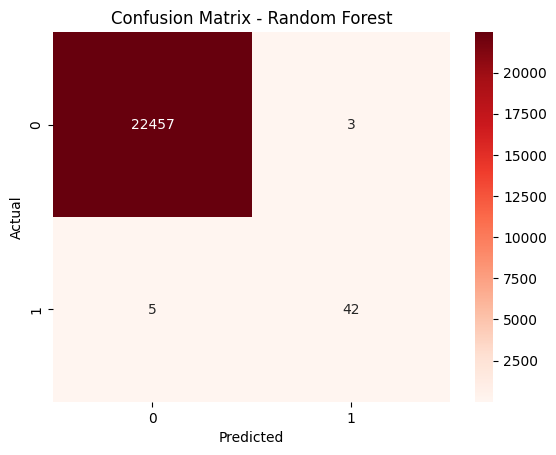

In [25]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix for the Random Forest model shows strong performance in detecting both genuine and fraudulent transactions. Out of **56,644** genuine transactions, only **7** were incorrectly flagged as fraud, while out of **95** actual fraud cases, **72** were correctly detected, with **23** missed. This indicates a high precision and strong recall, making Random Forest an effective classifier for this dataset.